# 1) Load necessary libraries

In [35]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [38]:
df.sample(5)

,Age,EstimatedSalary,Purchased
160,32,100000,1
307,47,113000,1
230,35,147000,1
195,34,43000,0
273,39,106000,1


# 2]  Train-Test Split

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test,  y_train, y_test = train_test_split(df.drop('Purchased', axis = 1),
                                                        df['Purchased'],
                                                            test_size = 0.3, 
                                                                random_state = 42)

In [40]:
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (280, 2)
y_train: (280,)
X_test: (120, 2)
y_test: (120,)


In [41]:
X_train.head()

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000


In [42]:
y_train.head()

157    0
109    0
17     1
347    1
24     1
Name: Purchased, dtype: int64

# 3] Standard Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scale.fit(X_train)

# transform train and test sets
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [44]:
scale.mean_

array([3.75750000e+01, 7.05892857e+04])

# Standar scaling formula
- (xi-mean)/std_dev

In [52]:
mean = X_train['Age'].mean()
std_dev = X_train['Age'].std()
X1 = X_train['Age'].iloc[0]

In [53]:
(X1- mean)/std_dev

-0.8410156942191406

In [11]:
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.head()

,Age,EstimatedSalary
0,-0.842522,0.130156
1,0.041758,0.277702
2,0.729530,-1.315791
3,1.613809,1.103957
4,0.827784,-1.404318


In [12]:
X_train.head()

,Age,EstimatedSalary
157,29,75000
109,38,80000
17,45,26000
347,54,108000
24,46,23000


# 4] Effect of Standarization 

In [13]:
np.round(X_train.describe(), 3)

,Age,EstimatedSalary
count,280.000,280.000
mean,37.575,70589.286
std,10.196,33948.505
min,18.000,15000.000
25%,30.000,44000.000
50%,37.000,71000.000
75%,45.000,88000.000
max,60.000,150000.000


In [14]:
np.round(X_train_scale.describe(),3)


#mean = 0 i.e. mean centric

,Age,EstimatedSalary
count,280.000,280.000
mean,-0.000,0.000
std,1.002,1.002
min,-1.923,-1.640
25%,-0.744,-0.785
50%,-0.056,0.012
75%,0.730,0.514
max,2.203,2.343


# 5] Observe Standarization effect on plots

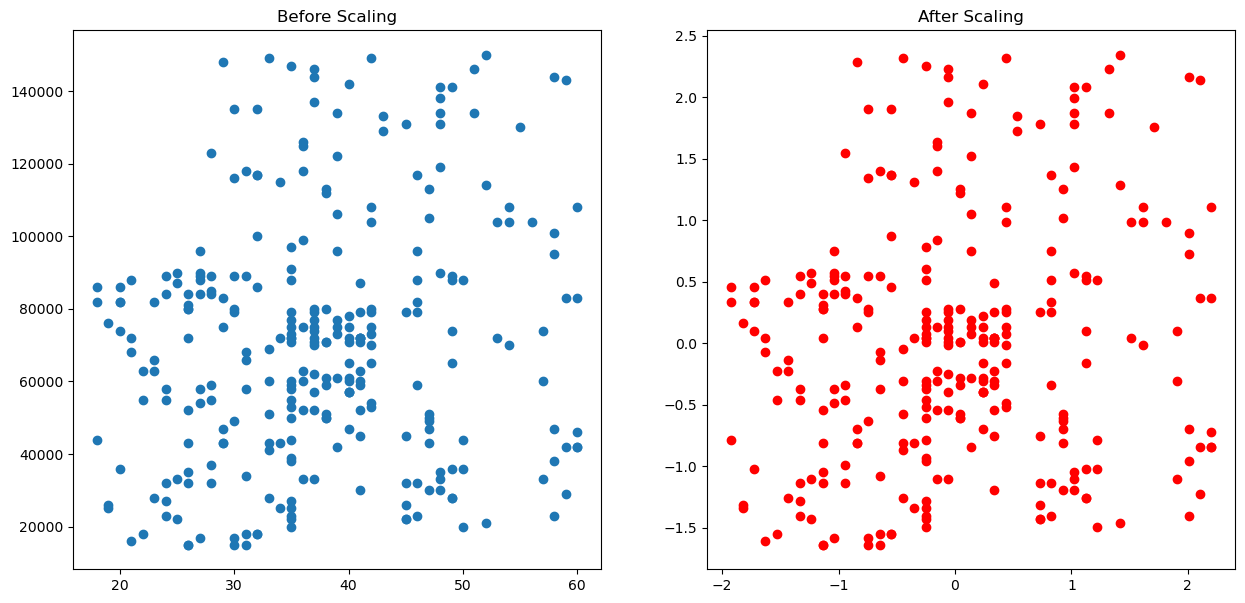

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))

# x_train 
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
#x_scale
ax2.scatter(X_train_scale['Age'], X_train_scale['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

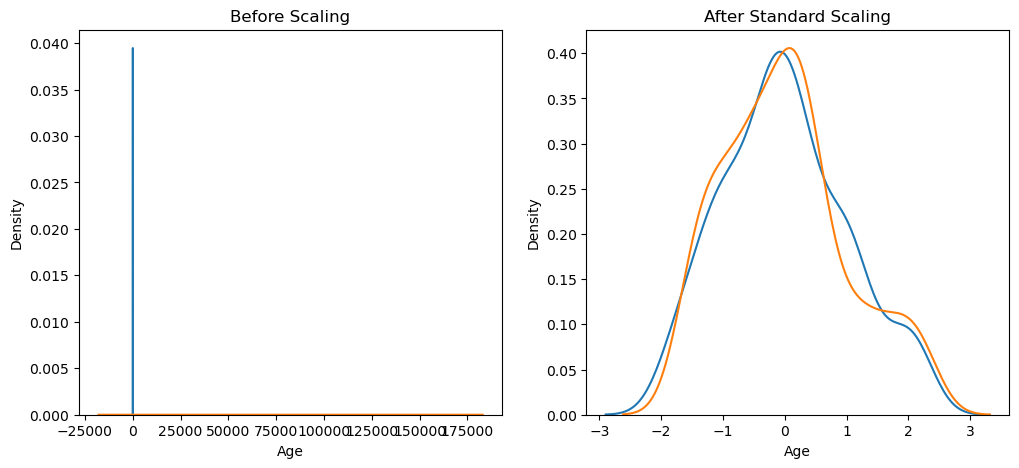

In [16]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scale['Age'], ax=ax2)
sns.kdeplot(X_train_scale['EstimatedSalary'], ax=ax2)
plt.show()

# 6] Before and After difference on individual Feature 

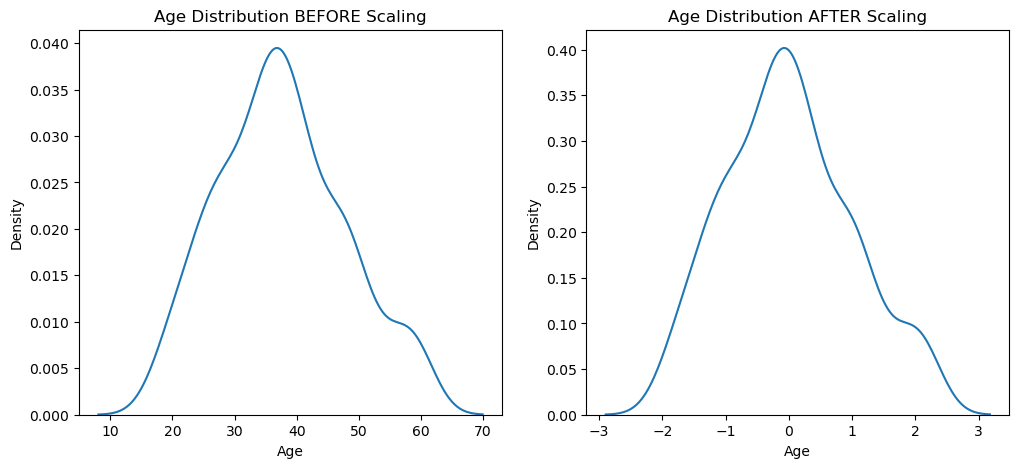

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution BEFORE Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution AFTER Scaling')
sns.kdeplot(X_train_scale['Age'], ax=ax2)
plt.show()

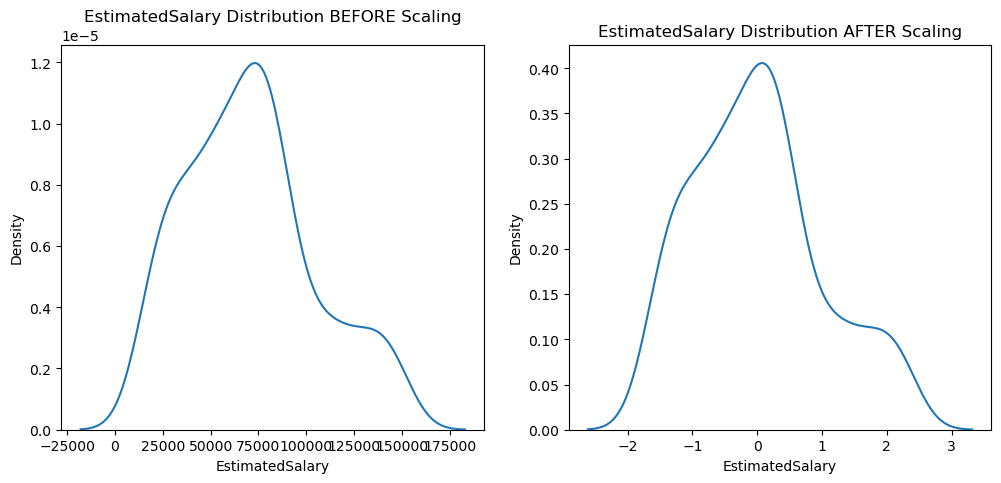

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('EstimatedSalary Distribution BEFORE Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('EstimatedSalary Distribution AFTER Scaling')
sns.kdeplot(X_train_scale['EstimatedSalary'], ax=ax2)
plt.show()

# Observing Standard Scaling effect on model training

In [19]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg_scale = LogisticRegression()

In [20]:
lg.fit(X_train,y_train)
lg_scale.fit(X_train_scale, y_train)

LogisticRegression()

In [21]:
y_pred = lg.predict(X_test)
y_pred_scale = lg_scale.predict(X_test_scale)

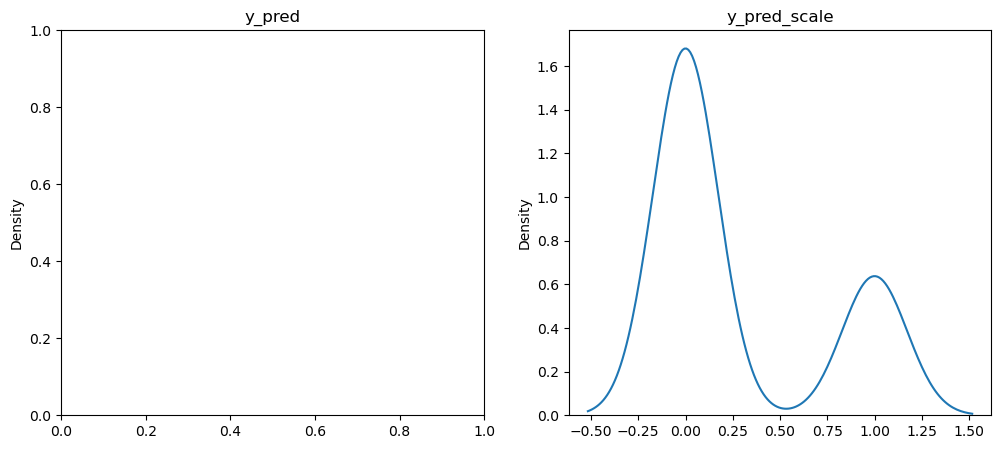

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# y_pred
ax1.set_title('y_pred')
sns.kdeplot(y_pred, ax=ax1)

# y_pred_scale
ax2.set_title('y_pred_scale')
sns.kdeplot(y_pred_scale, ax=ax2)
plt.show()

In [23]:
from sklearn.metrics import accuracy_score

print("Actual data", accuracy_score(y_test,y_pred))
print("Scaled data", accuracy_score(y_test,y_pred_scale))

Actual data 0.6083333333333333
Scaled data 0.85


## Hence, Standarization increases accuracy of the model.

# Observe Outlier in Standarized Data

In [24]:
# add outlier in data 

df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df.tail()

,Age,EstimatedSalary,Purchased
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1
402,95,350000,1


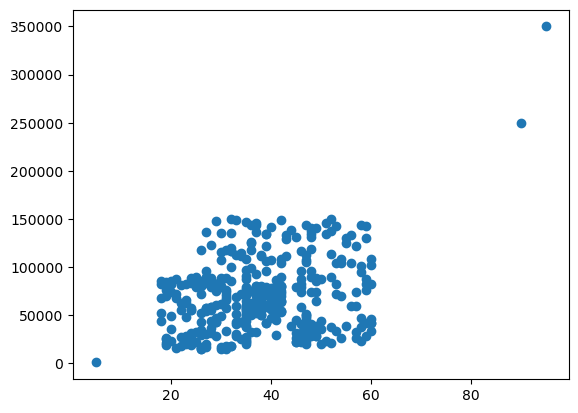

In [25]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [27]:
outlier_scale = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
outlier_scale.fit(X_train)

# transform train and test sets
X_train_outlier_scale = outlier_scale.transform(X_train)
X_test_outlier_scale = outlier_scale.transform(X_test)

In [28]:
X_train_outlier_scale = pd.DataFrame(X_train_outlier_scale, columns=X_train.columns)
X_test_outlier_scale = pd.DataFrame(X_test_outlier_scale, columns=X_test.columns)

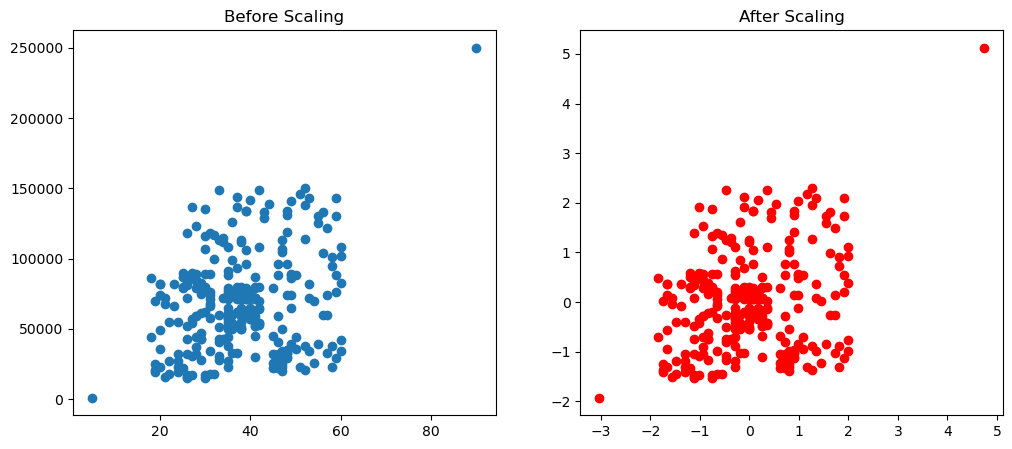

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_outlier_scale['Age'], X_train_outlier_scale['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

# Hence, standarization doesn't help in case of outliers